In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np
#import os
import matplotlib.pyplot as plt
from pathlib import Path
#import seaborn as sns
%matplotlib inline
import os

### 1 - Importação de tabelas de projeção do IBGE (2010-2060)

* Origem da tabela de projeção do IBGE
* Projeções da População do Brasil e Unidades da Federação por sexo e idade: 2010-2060

https://www.ibge.gov.br/novo-portal-destaques/27470-projecao-da-populacao-das-unidades-da-federacao-por-sexo-e-idade-simples.html
https://www.ibge.gov.br/estatisticas/sociais/populacao/9109-projecao-da-populacao.html?=&t=resultados
  

In [2]:
# Pasta corrente
proj_ibge = Path.cwd() / 'dados' / 'Tabuas_Mortalidade 2010-2060.xls'

In [3]:
# Verifica a pasta corrente
pasta = os.getcwd()
# parametros: n_epochs = 500; n_batch = 2, n_neurons=50
# Denominar a simulação pelo parâmetro que foi alterado 

# Simulação somente 1 camada, e sem função de ativação = ReLu
#pasta_graficos = os.path.join(pasta, "graficos2")

# Simulação somente 1 camada
#pasta_graficos = os.path.join(pasta, "graficos3")

# Simulação 100 neuronios
#pasta_graficos = os.path.join(pasta, "graficos4")

# Simulação sem aplicação de dropout 20%
#pasta_graficos = os.path.join(pasta, "graficos5")

# Simulação epochs = 1000
pasta_graficos = os.path.join(pasta, "graficos")



* #### 1.1 - Importação dos resultados dos qx pelo método LSTM

In [4]:


# Simulação somente 1 camada, e sem função de ativação = ReLu
#proj_lstm1000 = Path.cwd() / 'resultados2' / 'lstm_previsao_qx_500_semRELU.csv'

# Simulação somente 1 camada
#proj_lstm1000 = Path.cwd() / 'resultados3' / 'lstm_previsao_qx_500_1c.csv'

# Simulação 100 neuronios
#proj_lstm1000 = Path.cwd() / 'resultados4' / 'lstm_previsao_qx_500_100_neuronios.csv'

# Simulação sem aplicação de dropout 20%
#proj_lstm1000 = Path.cwd() / 'resultados5' / 'lstm_previsao_qx_500_sem_dropout.csv'

# Simulação epochs=1000
proj_lstm1000 = Path.cwd() / 'resultados' / 'lstm_previsao_qx_1000.csv'


* #### 1.2  - Leitura do arquivo da projeção do IBGE

In [5]:
colunas = ['Idade', 'nMx', 'nqx', 'nDx', 'npx', 'lx', 'nLx', 'Tx', 'ex']

df_ibge=pd.read_excel(proj_ibge,
                      names = colunas,
                      sheet_name = "Brasil",
                      skiprows = 9,
                      usecols = "U:AC")

In [6]:
# limpeza da importação: primeira: deleta as linhas com NaN. Segunda: deleta as linhas onde a coluna Idade contem Ano: e idade
df_ibge.dropna(axis=0, how='all', inplace=True)
df_ibge = df_ibge[~df_ibge['Idade'].isin(['Ano:','Idade'])]

In [7]:
df_ibge.reset_index(drop=True, inplace=True)

In [8]:
y = np.repeat(np.arange(2010, 2061), repeats=20)
y

array([2010, 2010, 2010, ..., 2060, 2060, 2060])

In [9]:
# pd.DataFrame(np.array(predict_res).reshape(-1)) # colocar a serie em uma unica coluna

In [11]:
df_ibge = df_ibge.assign(ano=np.repeat(np.arange(2010, 2061), repeats=20))

In [12]:
df_ibge.head()

,Idade,nMx,nqx,nDx,npx,lx,nLx,Tx,ex,ano
0,0,0.01749,0.0172159,1721.59,0.982784,100000,98453.4,7.3857e+06,73.857,2010
1,1,0.00066,0.00263212,258.681,0.997368,98278.4,392466,7.28725e+06,74.149,2010
2,5,0.0003,0.00148481,145.541,0.998515,98019.7,489735,6.89478e+06,70.3407,2010
3,10,0.00036,0.00178741,174.941,0.998213,97874.2,488934,6.40505e+06,65.4416,2010
4,15,0.0012,0.00598205,584.442,0.994018,97699.2,487035,5.91611e+06,60.5543,2010


In [13]:
df_ibge.tail()

,Idade,nMx,nqx,nDx,npx,lx,nLx,Tx,ex,ano
1015,70,0.0212,0.100683,8147.73,0.899317,80924.2,384252,1.41362e+06,17.4685,2060
1016,75,0.0331,0.152838,11123,0.847162,72776.5,336075,1.02937e+06,14.1443,2060
1017,80,0.05164,0.228689,14099.5,0.771311,61653.5,273019,693296,11.245,2060
1018,85,0.07944,0.331388,15758.8,0.668612,47554,198373,420277,8.83789,2060
1019,90,0.14328,1,31795.2,0,31795.2,221904,221904,6.97917,2060


In [14]:
df_ibge_qx = df_ibge
df_ibge_qx = df_ibge.loc[:,['Idade', 'nqx', 'ano']].copy()

In [15]:
df_ibge_qx.head()

,Idade,nqx,ano
0,0,0.0172159,2010
1,1,0.00263212,2010
2,5,0.00148481,2010
3,10,0.00178741,2010
4,15,0.00598205,2010


In [16]:
df_ibge_qx.shape

(1020, 3)

In [17]:
df_ibge_qx_fim = df_ibge_qx.pivot(index='Idade', columns='ano', values='nqx').reset_index()
df_ibge_qx_fim.head()

ano,Idade,2010,2011,2012,2013,2014,2015,2016,2017,2018,...,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060
0,0,0.0172159,0.0164252,0.0156942,0.0150206,0.014398,0.0138234,0.0132939,0.0128053,0.0123547,...,0.00719628,0.00715703,0.00711811,0.00708254,0.00704982,0.00701786,0.00698865,0.0069612,0.00693659,0.00691366
1,1,0.00263212,0.00255453,0.00248562,0.00241037,0.00234841,0.00228361,0.00221972,0.00216518,0.00210572,...,0.00117746,0.00116475,0.00115306,0.00114302,0.00113401,0.00112804,0.00110962,0.00110253,0.00109425,0.00108809
2,5,0.00148481,0.00144942,0.00140927,0.00137761,0.00134216,0.00131134,0.00127463,0.00124556,0.00121134,...,0.000701658,0.00068318,0.000676231,0.000669555,0.000660518,0.000657349,0.000651243,0.000647532,0.00064246,0.000638036
3,10,0.00178741,0.00174617,0.00169749,0.00165701,0.00161777,0.00157513,0.00153934,0.00149668,0.00146391,...,0.000815335,0.000809178,0.000803355,0.000798046,0.000792569,0.000787275,0.00078089,0.000772159,0.000764941,0.000755369
4,15,0.00598205,0.00583226,0.00568119,0.00554143,0.00540222,0.00527262,0.00514837,0.00503363,0.00491949,...,0.00291406,0.0028884,0.00286412,0.0028494,0.00281905,0.00279844,0.00277979,0.00276266,0.00274051,0.00272787


In [18]:
# Expectativa de vida:
df_ibge_ex = df_ibge.loc[:,['Idade', 'ex', 'ano']].copy()
# Ao nascer:
df_ibge_ex0 = df_ibge_ex[(df_ibge_ex['Idade']==0) & (df_ibge_ex['ano']>=2019)& (df_ibge_ex['ano']<=2038)]

# Aos 90:
#df_ibge_ex90 = df_ibge_ex[(df_ibge_ex['Idade']==90) & (df_ibge_ex['ano']>=2019)& (df_ibge_ex['ano']<=2038)]

In [19]:
df_ibge_ex0.head()

,Idade,ex,ano
180,0,76.501,2019
200,0,76.7415,2020
220,0,76.9722,2021
240,0,77.1917,2022
260,0,77.4024,2023


### 2 - Importação dos resultados dos qx pelo método Lee-Carter

In [20]:
# Lee-carter
'leecarter_previsao.csv'
proj_leecarter = Path.cwd() / 'resultados' / 'leecarter_previsao.csv'

In [21]:
df_leecarter = pd.read_csv(proj_leecarter, index_col=[0])
print(df_leecarter.shape)
df_leecarter.head()

(117, 20)


,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038
0,0.012061,0.011490,0.010945,0.010427,0.009932,0.009462,0.009013,0.008586,0.008179,0.007792,0.007422,0.007071,0.006735,0.006416,0.006112,0.005822,0.005547,0.005284,0.005033,0.004795
1,0.000735,0.000681,0.000631,0.000585,0.000542,0.000502,0.000466,0.000431,0.000400,0.000370,0.000343,0.000318,0.000295,0.000273,0.000253,0.000235,0.000217,0.000201,0.000187,0.000173
2,0.000482,0.000452,0.000424,0.000397,0.000372,0.000349,0.000327,0.000306,0.000287,0.000269,0.000252,0.000237,0.000222,0.000208,0.000195,0.000183,0.000171,0.000160,0.000150,0.000141
3,0.000363,0.000341,0.000320,0.000301,0.000282,0.000265,0.000249,0.000234,0.000220,0.000206,0.000194,0.000182,0.000171,0.000161,0.000151,0.000142,0.000133,0.000125,0.000117,0.000110
4,0.000299,0.000282,0.000266,0.000252,0.000237,0.000224,0.000212,0.000200,0.000189,0.000178,0.000168,0.000159,0.000150,0.000141,0.000133,0.000126,0.000119,0.000112,0.000106,0.000100


#### FUNÇÕES ATUARIAIS (comum para Lee-Carter e LSTM)

* CRIAR FUNÇÃO COM AS FORMULAS ATUARIAIS, A PARTIR DOS qx's para submeter os qx, Lee-Carter e LSTM
* UM AVISO IMPORTANTE DE O PORQUê NÃO ESTIMAR PARA IDADES MAIORES QUE 90: a TÁBUA NÃO ESTÁ COMPLETA, IDADE POR IDADE (IDADE+1)

In [22]:
# FUNÇÕES ATUARIAIS
def comutacao():
    lx = []
    dx = []
    Lx = []
    Tx = []
    expx = []
    
    lx.append(100000.0)
    
    for idade in range(0, w):
        dx.append(qx[idade]*lx[idade])  # dx = qx[idade]*lx[idade]/1000.0. TESTE: TIREI O 1000
        lx.append(lx[idade]-dx[idade])  # lx[idade+1] = lx[idade] - dx[idade]

    for idade in range(0, w):
        if dx[idade] !=0.0:
            # Lx[idade] = lx[idade] + lx[idade+1]/2
            Lx.append((lx[idade] + lx[idade+1])/2)
        else:
            Lx.append(0.0)
    
    for idade in range(0, w):
        if lx[idade] != 0.0:
            # Tx = sum(Lx[idade:])
            Tx.append(sum(Lx[idade:]))
            # exp = Tx[idade]/lx[idade]
            expx.append(Tx[idade]/lx[idade])
        else:
            Tx.append(0.0)
            expx.append(0.0)

    return idade, qx, dx, lx, Lx, Tx, expx

In [23]:
# Função para unir as listas em linha
def unirSeries(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx

    return df1.join(df.drop(explode, 1), how='left')

#### 2.1 - Rotina para a expectativa de vida - Método Lee-Carter

In [24]:
vetor_dados = []
dados_lee = [] # np.empty((8,0)).tolist()
ano = 2018
idade = []
ano_rept = []

for i in range(2019,2039): # Leitura de cada ANO desde 2019 ATÉ 2039
    ano += 1
    # qx das tabelas do Lee-Carter
    qx = df_leecarter[str(i)]
    w = df_leecarter.shape[0] # idade limite, onde não haverá vivos
    x, qx, dx, lx, Lx, Tx, expx = comutacao()

    idade = np.arange(0, x+1).tolist() #list(range(0, idade+1))
    ano_rept = np.repeat(ano, x+1).tolist()

    vetor_dados = [idade, qx, dx, lx[:-1], Lx, Tx, expx, ano_rept]
    # Aplicar extend para gravar as comutações, pois é uma lista de listas de valores
    dados_lee.append(vetor_dados)

In [25]:
pd.DataFrame(dados_lee).shape

(20, 8)

In [26]:
df_temp = pd.DataFrame(dados_lee, columns=['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
df_leecarter_compl = unirSeries(df_temp,['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
# df_dados.shape -> (2421,8). Desfeito vetor. Variaveis ao longo das linhas
df_leecarter_compl = df_leecarter_compl.reset_index(drop=True)

In [27]:
df_leecarter_compl.head()

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
0,0,0.012061,1206.140658,100000.000000,99396.929671,7.625760e+06,76.257604,2019
1,1,0.000735,72.627622,98793.859342,98757.545531,7.526363e+06,76.182503,2019
2,2,0.000482,47.595762,98721.231720,98697.433839,7.427606e+06,75.238181,2019
3,3,0.000363,35.796732,98673.635958,98655.737592,7.328908e+06,74.274232,2019
4,4,0.000299,29.486842,98637.839226,98623.095806,7.230253e+06,73.301005,2019


In [28]:
# Expectativa de vida:
# Ao nascer:
df_leecarter0 = df_leecarter_compl[df_leecarter_compl['idade']==0]
# Aos 90:
#df_leecarter90 = df_leecarter_compl[df_leecarter_compl['idade']==90]

In [31]:
df_leecarter0.head(10)

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
0,0,0.012061,1206.140658,100000.0,99396.929671,7.625760e+06,76.257604,2019
117,0,0.011490,1148.978909,100000.0,99425.510546,7.649510e+06,76.495098,2020
234,0,0.010945,1094.526185,100000.0,99452.736908,7.672794e+06,76.727938,2021
351,0,0.010427,1042.654100,100000.0,99478.672950,7.695625e+06,76.956252,2022
468,0,0.009932,993.240351,100000.0,99503.379825,7.718017e+06,77.180166,2023
585,0,0.009462,946.168431,100000.0,99526.915784,7.739980e+06,77.399798,2024
702,0,0.009013,901.327357,100000.0,99549.336321,7.761526e+06,77.615264,2025
819,0,0.008586,858.611404,100000.0,99570.694298,7.782667e+06,77.826673,2026
936,0,0.008179,817.919857,100000.0,99591.040072,7.803413e+06,78.034133,2027
1053,0,0.007792,779.156775,100000.0,99610.421613,7.823774e+06,78.237744,2028


In [30]:
df_leecarter0.tail()

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
1755,0,0.005822,582.249933,100000.0,99708.875034,7.938387e+06,79.383865,2034
1872,0,0.005547,554.655784,100000.0,99722.672108,7.956310e+06,79.563101,2035
1989,0,0.005284,528.369385,100000.0,99735.815307,7.973918e+06,79.739183,2036
2106,0,0.005033,503.328758,100000.0,99748.335621,7.991218e+06,79.912184,2037
2223,0,0.004795,479.474864,100000.0,99760.262568,8.008218e+06,80.082175,2038


### 3 - Importação dos resultados dos qx pelo método LSTM - Padrão

In [32]:
proj_lstm500 = Path.cwd() / 'resultados' / 'lstm_previsao_qx_500.csv'

In [33]:
df_lstm500 = pd.read_csv(proj_lstm500, index_col=[0])
print(df_lstm500.shape)
df_lstm500.head()

(117, 10)


,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,0.012066,0.011699,0.011360,0.011193,0.011031,0.010887,0.010760,0.010649,0.010552,0.010468
1,0.000852,0.000850,0.000850,0.000849,0.000848,0.000847,0.000847,0.000846,0.000847,0.000847
2,0.000529,0.000523,0.000519,0.000518,0.000516,0.000515,0.000514,0.000513,0.000512,0.000512
3,0.000405,0.000399,0.000395,0.000393,0.000392,0.000390,0.000389,0.000389,0.000388,0.000387
4,0.000328,0.000323,0.000318,0.000316,0.000314,0.000312,0.000311,0.000309,0.000308,0.000307


In [34]:
df_lstm500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 116
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2019    117 non-null    float64
 1   2020    117 non-null    float64
 2   2021    117 non-null    float64
 3   2022    117 non-null    float64
 4   2023    117 non-null    float64
 5   2024    117 non-null    float64
 6   2025    117 non-null    float64
 7   2026    117 non-null    float64
 8   2027    117 non-null    float64
 9   2028    117 non-null    float64
dtypes: float64(10)
memory usage: 10.1 KB


#### 3.1 - Rotina para a expectativa de vida - Método LSTM

In [35]:
vetor_dados = []
dados_lstm500 = [] # np.empty((8,0)).tolist()
ano = 2018
idade = []
ano_rept = []

for i in range(2019,2029): # Leitura de cada ANO desde 2019 ATÉ 2028
    ano += 1
    # qx das tabelas do modelo LSTM
    qx = df_lstm500[str(i)]
    w = df_lstm500.shape[0] # idade limite, onde não haverá vivos
    x, qx, dx, lx, Lx, Tx, expx = comutacao()

    idade = np.arange(0, x+1).tolist() #list(range(0, idade+1))
    ano_rept = np.repeat(ano, x+1).tolist()

    vetor_dados = [idade, qx, dx, lx[:-1], Lx, Tx, expx, ano_rept]
    # Aplicar extend para gravar as comutações, pois é uma lista de listas de valores
    dados_lstm500.append(vetor_dados)

In [36]:
pd.DataFrame(dados_lstm500).shape

(10, 8)

In [37]:
df_temp = pd.DataFrame(dados_lstm500, columns=['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
df_lstm_comp500 = unirSeries(df_temp,['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
# df_dados.shape -> (2421,8). Desfeito vetor. Variaveis ao longo das linhas
df_lstm_comp500 = df_lstm_comp500.reset_index(drop=True)

In [38]:
df_lstm_comp500.head()

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
0,0,0.012066,1206.589606,100000.000000,99396.705197,7.644248e+06,76.442475,2019
1,1,0.000852,84.173960,98793.410394,98751.323414,7.544851e+06,76.369980,2019
2,2,0.000529,52.228711,98709.236434,98683.122079,7.446099e+06,75.434678,2019
3,3,0.000405,39.922958,98657.007723,98637.046244,7.347416e+06,74.474348,2019
4,4,0.000328,32.382227,98617.084766,98600.893652,7.248779e+06,73.504295,2019


In [39]:
# Expectativa de vida:
# Ao nascer:
df_lstm0_500 = df_lstm_comp500[df_lstm_comp500['idade']==0]
# Aos 90:
#df_lstm90_500 = df_lstm_comp500[df_lstm_comp500['idade']==90]

In [40]:
df_lstm0_500.head(10)

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
0,0,0.012066,1206.589606,100000.0,99396.705197,7.644248e+06,76.442475,2019
117,0,0.011699,1169.895661,100000.0,99415.052169,7.653545e+06,76.535446,2020
234,0,0.011360,1136.035910,100000.0,99431.982045,7.666361e+06,76.663605,2021
351,0,0.011193,1119.262954,100000.0,99440.368523,7.681347e+06,76.813469,2022
468,0,0.011031,1103.108525,100000.0,99448.445738,7.695270e+06,76.952705,2023
585,0,0.010887,1088.702900,100000.0,99455.648550,7.706174e+06,77.061737,2024
702,0,0.010760,1076.048159,100000.0,99461.975921,7.714442e+06,77.144420,2025
819,0,0.010649,1064.912873,100000.0,99467.543563,7.719985e+06,77.199849,2026
936,0,0.010552,1055.182317,100000.0,99472.408842,7.725771e+06,77.257705,2027
1053,0,0.010468,1046.827451,100000.0,99476.586275,7.725357e+06,77.253568,2028


### 4 - Base de simulação

In [41]:
df_lstm1000 = pd.read_csv(proj_lstm1000, index_col=[0])
print(df_lstm1000.shape)
df_lstm1000.head()

(117, 10)


,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,0.012194,0.012025,0.011920,0.011865,0.011820,0.011785,0.011758,0.011740,0.011727,0.011720
1,0.000822,0.000812,0.000807,0.000806,0.000805,0.000804,0.000803,0.000802,0.000802,0.000801
2,0.000521,0.000516,0.000513,0.000510,0.000507,0.000504,0.000501,0.000499,0.000497,0.000496
3,0.000393,0.000389,0.000386,0.000384,0.000382,0.000381,0.000379,0.000378,0.000376,0.000375
4,0.000321,0.000312,0.000305,0.000300,0.000295,0.000290,0.000284,0.000279,0.000274,0.000268


In [42]:
vetor_dados = []
dados_lstm1000 = [] # np.empty((8,0)).tolist()
ano = 2018
idade = []
ano_rept = []

for i in range(2019,2029): # Leitura de cada ANO desde 2019 ATÉ 2028
    ano += 1
    # qx das tabelas do modelo LSTM
    qx = df_lstm1000[str(i)]
    w = df_lstm1000.shape[0] # idade limite, onde não haverá vivos
    x, qx, dx, lx, Lx, Tx, expx = comutacao()

    idade = np.arange(0, x+1).tolist() #list(range(0, idade+1))
    ano_rept = np.repeat(ano, x+1).tolist()

    vetor_dados = [idade, qx, dx, lx[:-1], Lx, Tx, expx, ano_rept]
    # Aplicar extend para gravar as comutações, pois é uma lista de listas de valores
    dados_lstm1000.append(vetor_dados)

In [43]:
df_temp = pd.DataFrame(dados_lstm1000, columns=['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
df_lstm_comp1000 = unirSeries(df_temp,['idade', 'qx_mil', 'dx', 'lx', 'Lx', 'Tx', 'expx', 'ano'])
# df_dados.shape -> (2421,8). Desfeito vetor. Variaveis ao longo das linhas
df_lstm_comp1000 = df_lstm_comp1000.reset_index(drop=True)

In [44]:
# Expectativa de vida:
# Ao nascer:
df_lstm0_1000 = df_lstm_comp1000[df_lstm_comp1000['idade']==0]
# Aos 90:
#df_lstm90_1000 = df_lstm_comp1000[df_lstm_comp1000['idade']==90]

In [45]:
df_lstm0_1000.head(10)

,idade,qx_mil,dx,lx,Lx,Tx,expx,ano
0,0,0.012194,1219.408417,100000.0,99390.295791,7.645973e+06,76.459726,2019
117,0,0.012025,1202.536449,100000.0,99398.731775,7.651012e+06,76.510117,2020
234,0,0.011920,1192.036149,100000.0,99403.981925,7.653585e+06,76.535846,2021
351,0,0.011865,1186.527183,100000.0,99406.736409,7.653889e+06,76.538895,2022
468,0,0.011820,1181.995883,100000.0,99409.002058,7.656358e+06,76.563585,2023
585,0,0.011785,1178.494711,100000.0,99410.752644,7.656782e+06,76.567819,2024
702,0,0.011758,1175.845526,100000.0,99412.077237,7.658056e+06,76.580555,2025
819,0,0.011740,1173.977782,100000.0,99413.011109,7.653593e+06,76.535932,2026
936,0,0.011727,1172.720528,100000.0,99413.639736,7.656940e+06,76.569396,2027
1053,0,0.011720,1171.954443,100000.0,99414.022778,7.654245e+06,76.542450,2028


### 4 - Comparar os resultados

#### 4.1 - Probabilidade de Morte ṕor idade

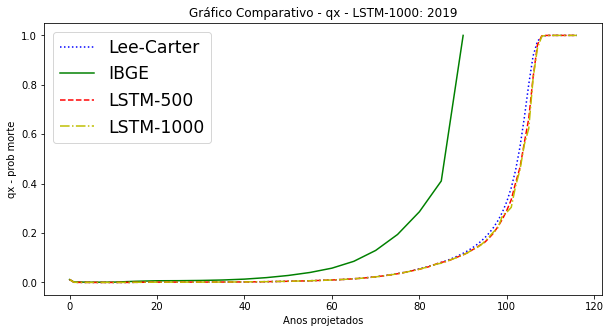

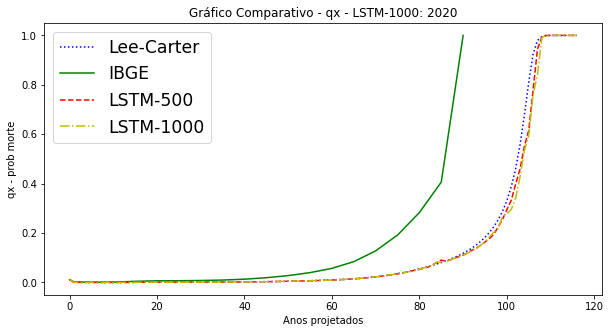

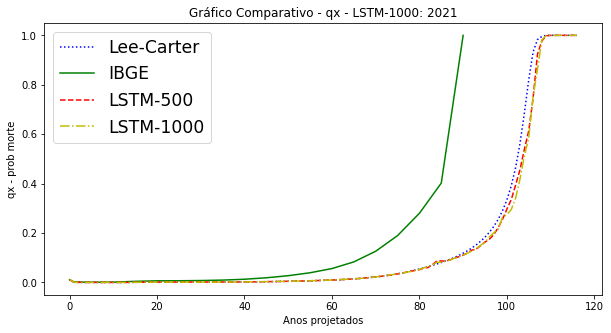

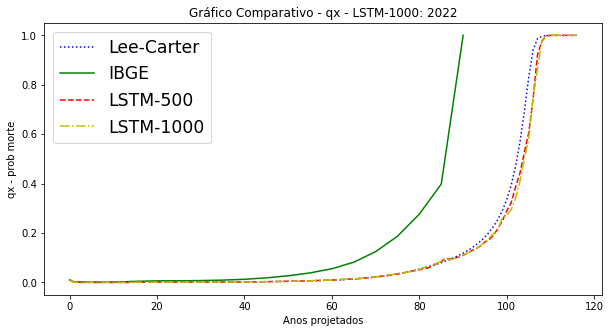

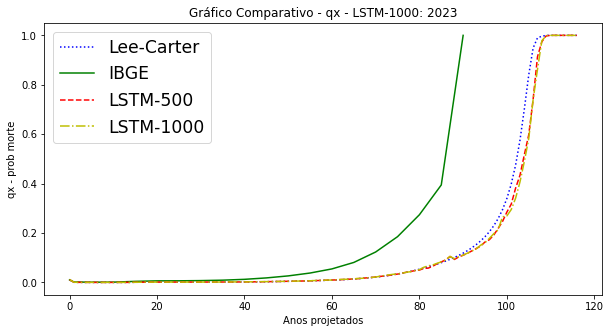

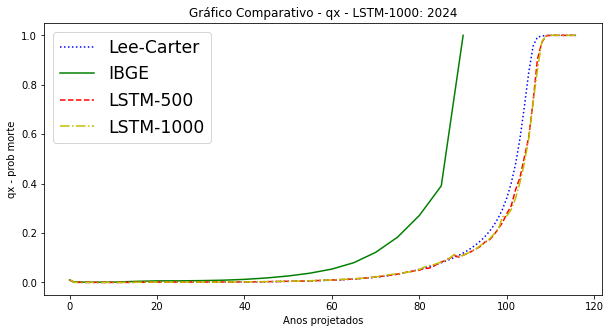

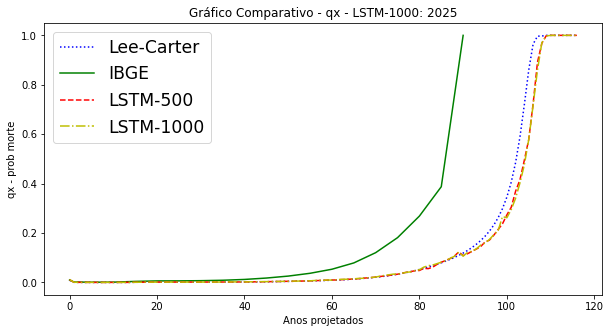

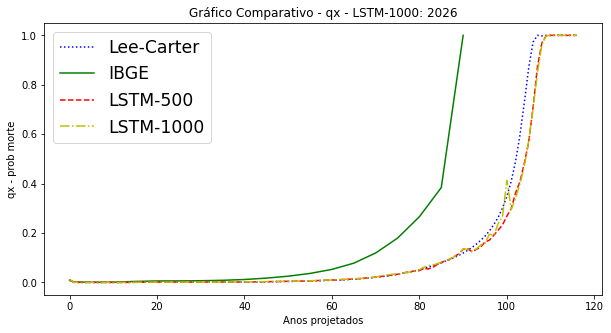

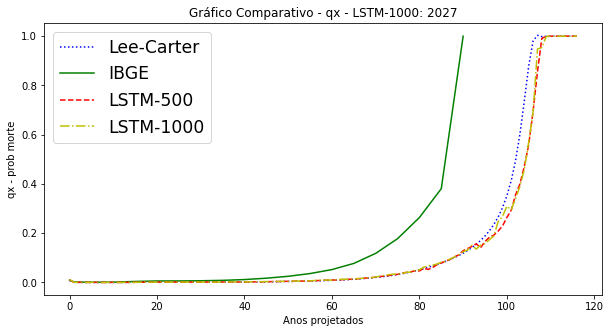

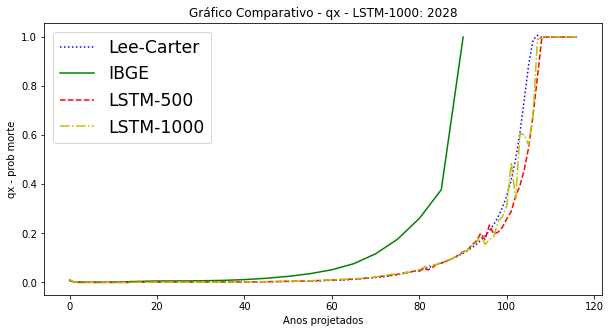

In [43]:
# Graficos
for ano in range(2019, 2029):
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(111)
    ax.plot(df_leecarter.index, df_leecarter[str(ano)], color='b', linestyle='dotted')
    ax.plot(df_ibge_qx_fim['Idade'], df_ibge_qx_fim[ano], color='g', linestyle='solid')  
    ax.plot(df_lstm500.index, df_lstm500[str(ano)], color='r', linestyle='dashed')
    ax.plot(df_lstm1000.index, df_lstm1000[str(ano)], color='y', linestyle='dashdot')
    # Simulação: somente 1 camada, e sem função de ativação = ReLu
    #ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-sem_ReLu'])
    # Simulação somente 1 camada
    #ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-500_1camada'])
    # Simulação 100 neuronios
    #ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-500_100_neuro'])
    # Simulacao 5: sem aplicação de dropout 20%
    #ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-500_sem_dropout'])
    # Simulacao: epochs=1000
    ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-1000'])

    
    # Simulação: somente 1 camada, e sem função de ativação = ReLu
    #plt.title('Gráfico Comparativo - qx - LSTM_sem_ReLu: %i' %ano)
    # Simulação somente 1 camada
    #plt.title('Gráfico Comparativo - qx - 1camadaLSTM: %i' %ano)
    # Simulação 100 neuronios
    #plt.title('Gráfico Comparativo - qx - LSTM-500_100_neuro: %i' %ano)
    # Simulacao 5: sem aplicação de dropout 20%
    #plt.title('Gráfico Comparativo - qx - LSTM-500_sem_dropout: %i' %ano)
    # Simulacao 5: sem aplicação de dropout 20%
    plt.title('Gráfico Comparativo - qx - LSTM-1000: %i' %ano)
    
    
    plt.xlabel('Anos projetados')
    plt.ylabel('qx - prob morte')
    
    # Simulação: somente 1 camada, e sem função de ativação = ReLu
    #plt.savefig(pasta_graficos + '/' + 'Comparativo dos métodos_qx_LSTM-500-semReLU'+str(ano)+'.png')
    # Simulação somente 1 camada
    #plt.savefig(pasta_graficos + '/' + 'Comparativo dos métodos_qx_LSTM-500-1c'+str(ano)+'.png')
    # Simulação 100 neuronios
    #plt.savefig(pasta_graficos + '/' + 'Comparativo dos métodos_qx_LSTM_100_neuro'+str(ano)+'.png')
    # Simulacao 5: sem aplicação de dropout 20%
    #plt.savefig(pasta_graficos + '/' + 'Comparativo dos métodos_qx_LSTM_sem_dropout'+str(ano)+'.png')
    # Simulacao: epochs = 1000
    plt.savefig(pasta_graficos + '/' + 'Comparativo dos métodos_qx_LSTM_epochs1000'+str(ano)+'.png')

    plt.show()

#### 4.2 - Expectativa de Vida ao Nascer projetada para os anos de 2019 a 2028

* Para verificar as diferenças para a Expectativa de vida ao nascer.

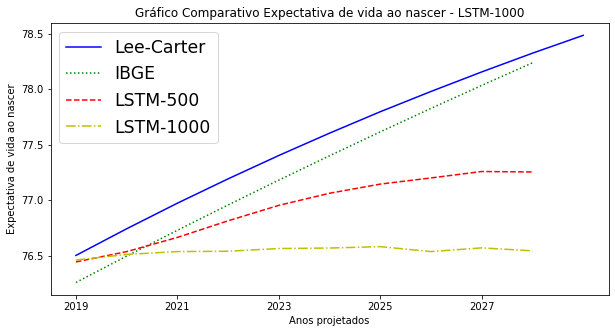

In [53]:
#Expectativa de vida ao nascer
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(df_ibge_ex0.ano, df_ibge_ex0.ex, color='b', linestyle='solid')
ax.plot(df_leecarter0.ano, df_leecarter0.expx, color='g', linestyle='dotted')
ax.plot(df_lstm0_500.ano, df_lstm0_500.expx, color='r', linestyle='dashed')
ax.plot(df_lstm0_1000.ano, df_lstm0_1000.expx, color='y', linestyle='dashdot')

# Simulação: somente 1 camada, e sem função de ativação = ReLu
#ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-sem_ReLu'])
# Simulação somente 1 camada
#ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-500_1camada'])
# Simulação 100 neuronios
#ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-500_100_neuro'])
# Simulacao 5: sem aplicação de dropout 20%
#ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-500_sem_dropout'])
# Simulacao: epochs = 1000
ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-1000'])


# Simulação: somente 1 camada, e sem função de ativação = ReLu
#plt.title('Gráfico Comparativo Expectativa de vida ao nascer - LSTM_sem_ReLu')
# Simulação somente 1 camada
#plt.title('Gráfico Comparativo Expectativa de vida ao nascer - 1camadaLSTM')
# Simulação 100 neuronios
#plt.title('Gráfico Comparativo Expectativa de vida ao nascer - LSTM-500_100_neuro')
# Simulacao 5: sem aplicação de dropout 20%
#plt.title('Gráfico Comparativo Expectativa de vida ao nascer - LSTM-500_sem_dropout')
# Simulacao: epochs = 1000
plt.title('Gráfico Comparativo Expectativa de vida ao nascer - LSTM-1000')


plt.xlabel('Anos projetados')

plt.ylabel('Expectativa de vida ao nascer')

plt.xticks(range(2019, 2029, 2))

# Simulação: somente 1 camada, e sem função de ativação = ReLu
#plt.savefig(pasta_graficos + '/' + 'Comparativo expectativa_vida_nascer_LSTM-500-semReLU.png')
# Simulação somente 1 camada
#plt.savefig(pasta_graficos + '/' + 'Comparativo expectativa_vida_nascer_LSTM-500-1c.png')
# Simulação 100 neuronios
#plt.savefig(pasta_graficos + '/' + 'Comparativo expectativa_vida_nascer_LSTM_100_neuro.png')
# Simulacao 5: sem aplicação de dropout 20%
#plt.savefig(pasta_graficos + '/' + 'Comparativo expectativa_vida_nascer_LSTM_sem_dropout.png')
# Simulacao 5: epochs = 1000
plt.savefig(pasta_graficos + '/' + 'Comparativo expectativa_vida_nascer_LSTM_1000.png')



plt.show()

 #### 4.3 - Log da Mortalidade geral por idade projetada para os anos de 2019 a 2028

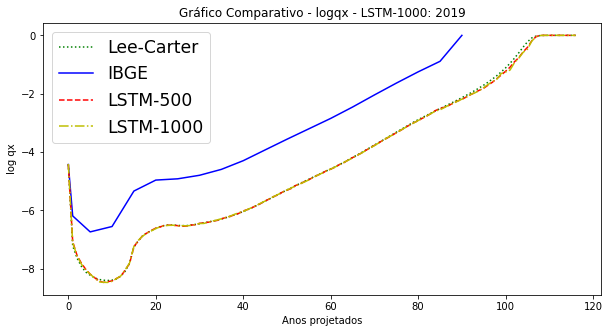

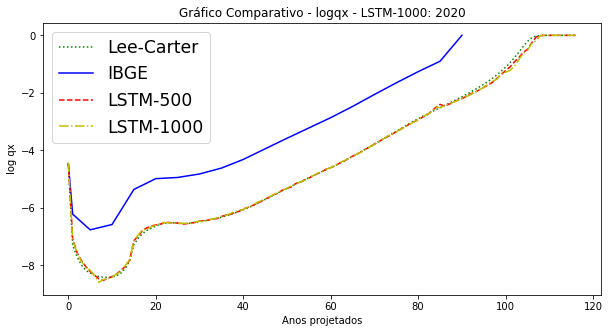

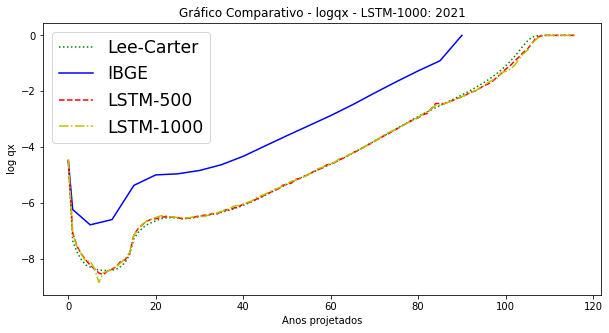

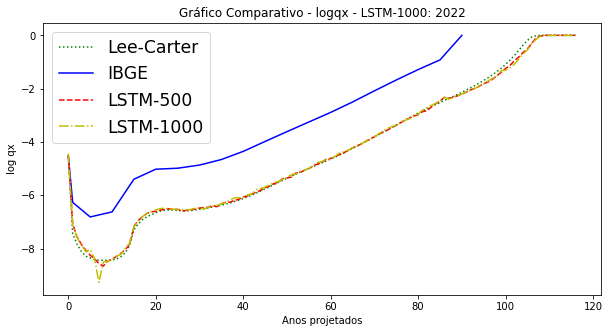

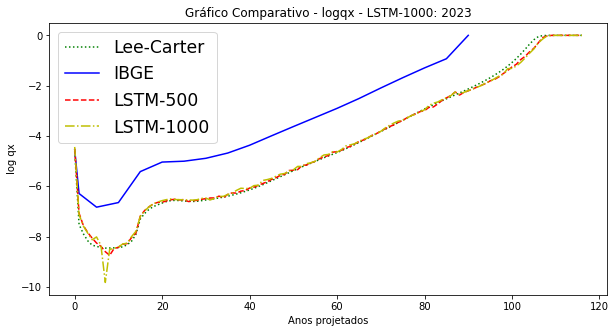

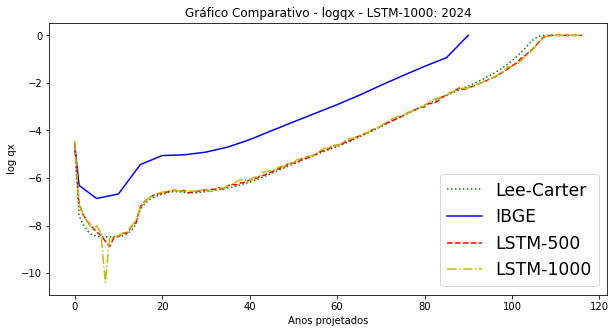

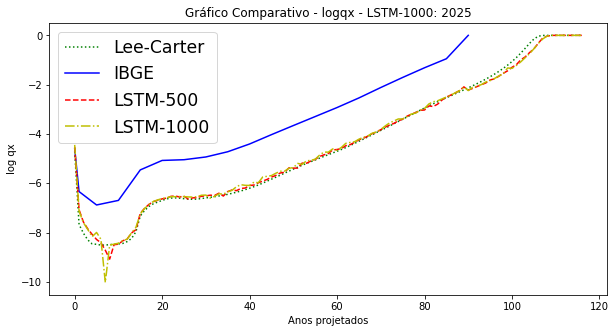

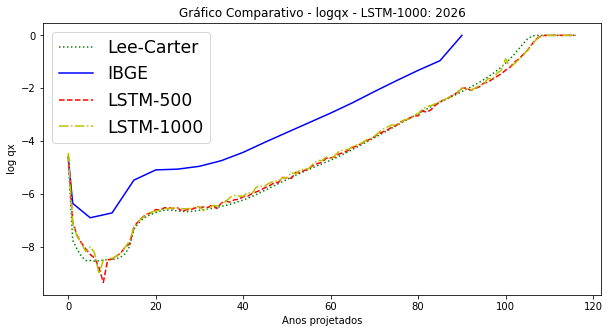

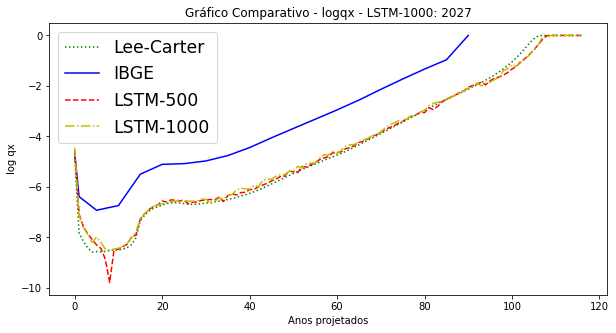

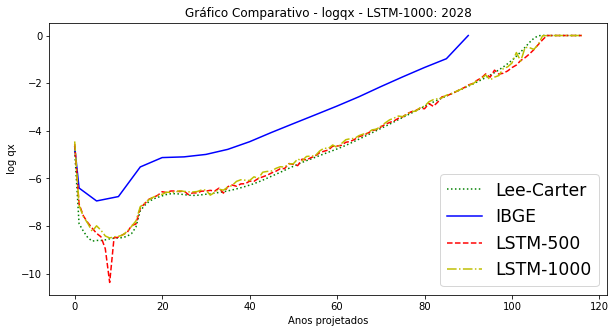

In [86]:
# Graficos
for ano in range(2019, 2029):
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(111)
    ax.plot(df_leecarter.index, np.log(df_leecarter[str(ano)]), color='g', linestyle='dotted')
    ax.plot(df_ibge_qx_fim['Idade'], np.log(np.array(df_ibge_qx_fim[ano], dtype=np.float)), color='b', linestyle='solid')  
    ax.plot(df_lstm500.index, np.log(df_lstm500[str(ano)]), color='r', linestyle='dashed')
    ax.plot(df_lstm1000.index, np.log(df_lstm1000[str(ano)]), color='y', linestyle='dashdot')
    
    # Simulação: somente 1 camada, e sem função de ativação = ReLu
    #ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-sem_ReLu'])
    # Simulação somente 1 camada
    #ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-500_1camada'])
    # Simulação 100 neuronios
    #ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-500_100_neuro'])
    # Simulacao 5: sem aplicação de dropout 20%
    #ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-500_sem_dropout'])
    # Simulacao: epochs = 1000
    ax.legend(loc='best', fontsize='xx-large', labels=['Lee-Carter', 'IBGE', 'LSTM-500', 'LSTM-1000'])

    
    # Simulação: somente 1 camada, e sem função de ativação = ReLu
    #plt.title('Gráfico Comparativo - logqx - LSTM_sem_ReLu: %i' %ano)
    # Simulação somente 1 camada
    #plt.title('Gráfico Comparativo - logqx - 1camadaLSTM: %i' %ano)
    # Simulação 100 neuronios
    #plt.title('Gráfico Comparativo - logqx - LSTM-500_100_neuro: %i' %ano)
    # Simulacao 5: sem aplicação de dropout 20%
    #plt.title('Gráfico Comparativo - logqx - LSTM-500_sem_dropout: %i' %ano)
    # Simulacao: epochs =1000
    plt.title('Gráfico Comparativo - logqx - LSTM-1000: %i' %ano)
    
    
    plt.xlabel('Anos projetados')
    plt.ylabel('log qx')
    
    # Simulação: somente 1 camada, e sem função de ativação = ReLu
    #plt.savefig(pasta_graficos + '/' + 'Comparativo dos métodos_logqx_LSTM-500-semReLU'+str(ano)+'.png')
    # Simulação somente 1 camada
    #plt.savefig(pasta_graficos + '/' + 'Comparativo dos métodos_logqx_LSTM-500-1c'+str(ano)+'.png')
    # Simulação 100 neuronios
    #plt.savefig(pasta_graficos + '/' + 'Comparativo dos métodos_logqx_LSTM_100_neuro'+str(ano)+'.png')
    # Simulacao 5: sem aplicação de dropout 20%
    #plt.savefig(pasta_graficos + '/' + 'Comparativo dos métodos_logqx_LSTM_sem_dropout'+str(ano)+'.png')
    # Simulacao: epochs =1000
    plt.savefig(pasta_graficos + '/' + 'Comparativo dos métodos_logqx_LSTM_1000'+str(ano)+'.png')
    
    
    plt.show()